# Classificação Roupas

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste,identificacoes_teste)) = dataset.load_data()

In [3]:
imagens_treino.shape

(60000, 28, 28)

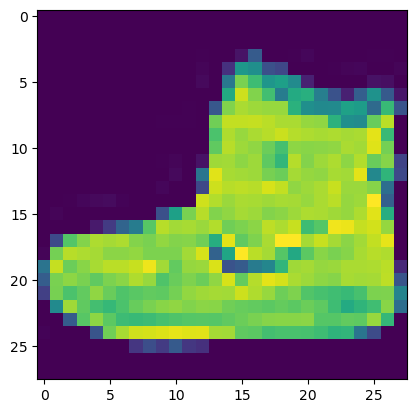

In [4]:
plt.imshow(imagens_treino[0])

In [5]:
nome_de_classificacoes = ['camiseta','calça','pullover','vestido','casaco','sandália','camisa','tênis','bolsa','bota']

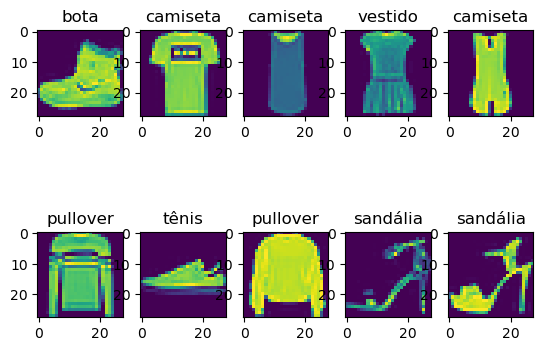

In [6]:
identificacoes_treino.min()
identificacoes_treino.max()
total_de_classificacoes = 10
for imagem in range(10):
    plt.subplot(2,5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nome_de_classificacoes[identificacoes_treino[imagem]])


In [7]:
#Normalização
imagens_treino = imagens_treino/float(255)

In [8]:
#Modelo
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation= tensorflow.nn.relu),
    keras.layers.Dense(64, activation= tensorflow.nn.relu),
    keras.layers.Dense(10, activation= tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy')
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4796


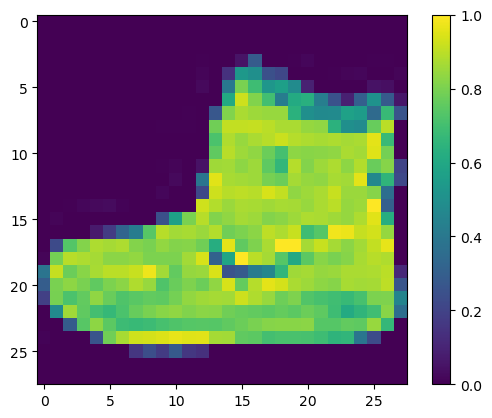

In [9]:
plt.imshow(imagens_treino[0])
plt.colorbar()

In [10]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation= tensorflow.nn.relu),
    keras.layers.Dense(10, activation= tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics =['accuracy'])
modelo.fit(imagens_treino, identificacoes_treino, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 2ms/step - loss: 0.4833 - accuracy: 0.8297
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3635 - accuracy: 0.8670
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3250 - accuracy: 0.8798
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3016 - accuracy: 0.8894
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2849 - accuracy: 0.8945


In [11]:
import numpy as np

testes = modelo.predict(imagens_teste)
print(np.argmax(testes[0]))
print(identificacoes_teste[1])

9
2


In [12]:
perda_teste , acuracia_teste = modelo.evaluate(imagens_teste,identificaoes_teste)

print('Perda do teste: ', perda_teste)
print('Acurácia do teste: %.2f%%' % (acuracia_teste * 100))

NameError: name 'identificaoes_teste' is not defined

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation= tensorflow.nn.relu),
    keras.layers.Dense(10, activation= tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics =['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split= 0.2)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5026 - accuracy: 0.8233 - val_loss: 0.4221 - val_accuracy: 0.8479
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3725 - accuracy: 0.8622 - val_loss: 0.3690 - val_accuracy: 0.8648
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3355 - accuracy: 0.8759 - val_loss: 0.3418 - val_accuracy: 0.8754
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3117 - accuracy: 0.8850 - val_loss: 0.3309 - val_accuracy: 0.8817
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2884 - accuracy: 0.8934 - val_loss: 0.3275 - val_accuracy: 0.8840


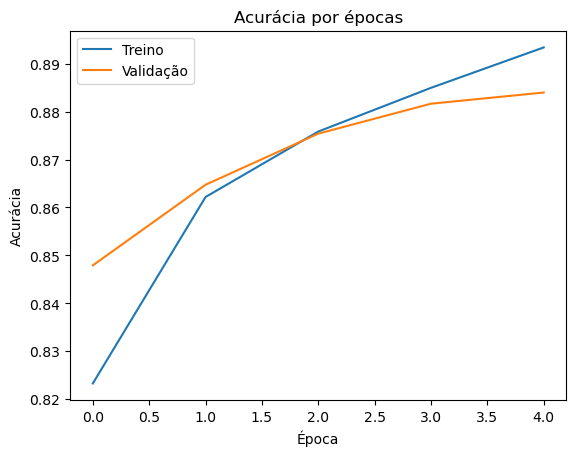

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino','Validação'])

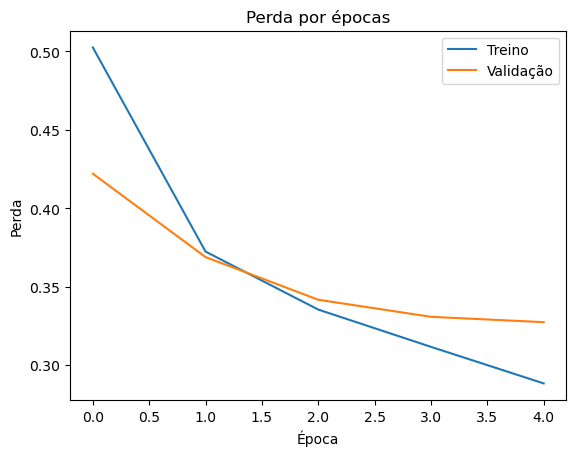

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treino','Validação'])

In [ ]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2


In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation= tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation= tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics =['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split= 0.2)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5296 - accuracy: 0.8118 - val_loss: 0.4082 - val_accuracy: 0.8544
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3976 - accuracy: 0.8542 - val_loss: 0.3728 - val_accuracy: 0.8623
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3612 - accuracy: 0.8677 - val_loss: 0.3523 - val_accuracy: 0.8726
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3422 - accuracy: 0.8734 - val_loss: 0.3469 - val_accuracy: 0.8770
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3221 - accuracy: 0.8796 - val_loss: 0.3312 - val_accuracy: 0.8815


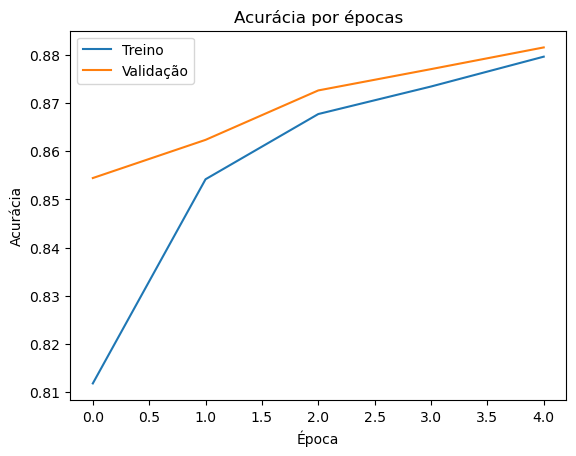

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino','Validação'])

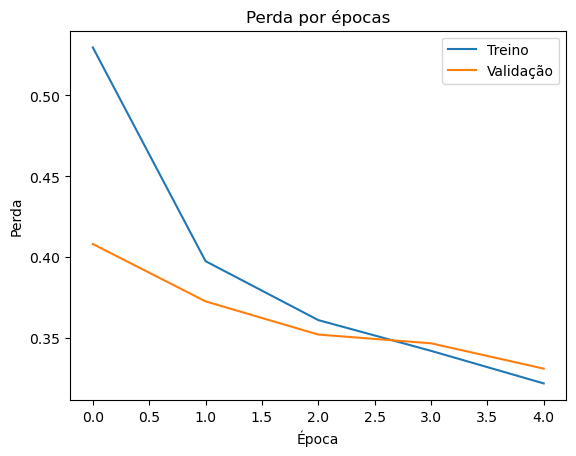

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treino','Validação'])

In [ ]:
import h5py


modelo.save('modelo.h5')

In [ ]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


#### Pesos

In [ ]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.10420758, -0.00790131, -0.01934534, ..., -0.05063549,
        -0.00498656, -0.00063106],
       [ 0.05263333, -0.03593229,  0.08047634, ..., -0.05688632,
        -0.06676554, -0.11287192],
       [ 0.16849673, -0.26361763,  0.02674426, ..., -0.11945172,
        -0.10906463, -0.06370474],
       ...,
       [ 0.0333226 , -0.04018963,  0.10586921, ...,  0.02823875,
        -0.14321724,  0.00408021],
       [ 0.21055625, -0.13844049,  0.22191183, ...,  0.18935074,
        -0.03132412, -0.17509478],
       [ 0.24901989, -0.07125165,  0.06540961, ..., -0.00930087,
         0.06132979, -0.01093831]], dtype=float32)

In [ ]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

array([-9.80708078e-02,  2.45980844e-01, -3.03019911e-01, -1.21434042e-02,
       -1.49316534e-01,  1.53357372e-01,  2.85097301e-01,  2.42926791e-01,
        7.96521306e-02,  4.87330891e-02,  3.46079707e-01,  3.59510779e-02,
        1.96943104e-01,  8.35683495e-02, -9.11342204e-02, -2.69793928e-01,
        1.48655787e-01,  9.36927423e-02, -2.44077072e-01, -1.76973138e-02,
        7.67531991e-02, -1.81597658e-02, -9.91907902e-03, -7.96422139e-02,
        1.21137150e-01,  2.50605494e-01,  2.93312758e-01,  2.13409573e-01,
       -1.00130610e-01,  3.31715541e-03,  3.12765539e-01,  3.37932825e-01,
       -4.10828274e-04,  1.63381323e-01,  3.07395160e-01,  1.46020934e-01,
        1.64528385e-01, -4.54890616e-02, -2.16432158e-02,  1.74665347e-01,
        2.11378381e-01,  2.25388631e-01, -1.37961442e-02, -3.84870842e-02,
        1.28651202e-01, -1.17263824e-01, -9.51650813e-02,  4.10457820e-01,
        1.23667844e-01,  1.67402953e-01,  2.16849670e-01, -6.96493313e-03,
        1.37634873e-01,  

In [ ]:
dimensao = pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((dimensao))
pesos_camada_dense_zerados.shape

(784, 256)

In [ ]:
modelo.layers[1].set_weights([pesos_camada_dense_zerados,vieses_camada_dense])

In [ ]:
modelo.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([-9.80708078e-02,  2.45980844e-01, -3.03019911e-01, -1.21434042e-02,
        -1.49316534e-01,  1.53357372e-01,  2.85097301e-01,  2.42926791e-01,
         7.96521306e-02,  4.87330891e-02,  3.46079707e-01,  3.59510779e-02,
         1.96943104e-01,  8.35683495e-02, -9.11342204e-02, -2.69793928e-01,
         1.48655787e-01,  9.36927423e-02, -2.44077072e-01, -1.76973138e-02,
         7.67531991e-02, -1.81597658e-02, -9.91907902e-03, -7.96422139e-02,
         1.21137150e-01,  2.50605494e-01,  2.93312758e-01,  2.13409573e-01,
        -1.00130610e-01,  3.31715541e-03,  3.12765539e-01,  3.37932825e-01,
        -4.10828274e-04,  1.63381323e-01,  3.07395160e-01,  1.46020934e-01,
         1.64528385e-01, -4.54890616e-02, -2.1643215

In [ ]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics =['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split= 0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5089 - accuracy: 0.8187 - val_loss: 0.4147 - val_accuracy: 0.8512
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3825 - accuracy: 0.8611 - val_loss: 0.3874 - val_accuracy: 0.8630
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3458 - accuracy: 0.8723 - val_loss: 0.3453 - val_accuracy: 0.8758
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3170 - accuracy: 0.8841 - val_loss: 0.3812 - val_accuracy: 0.8632
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3006 - accuracy: 0.8895 - val_loss: 0.3396 - val_accuracy: 0.8801


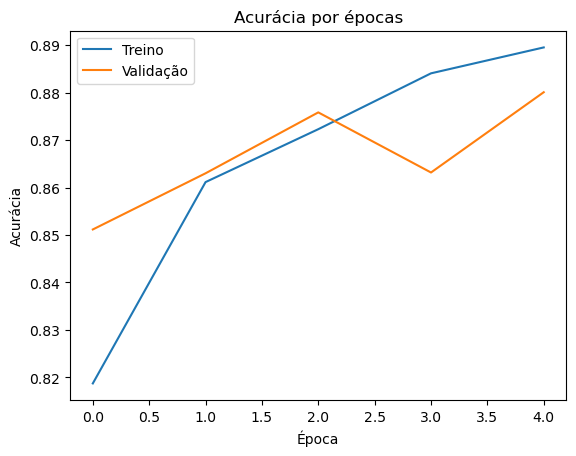

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino','Validação'])

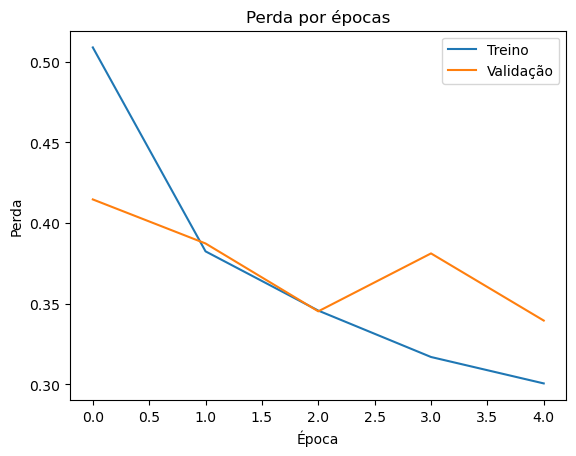

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treino','Validação'])

In [ ]:
pesos_camada_dense_aleatorios = np.random.rand(dimensao[0],dimensao[1])
pesos_camada_dense_aleatorios

modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])

modelo.layers[1].get_weights()
pesos_camada_dense_aleatorios

array([[0.29761323, 0.83971555, 0.46233315, ..., 0.60073611, 0.15095932,
        0.2356733 ],
       [0.50914615, 0.7154458 , 0.51415359, ..., 0.59511287, 0.99514808,
        0.38785346],
       [0.42924878, 0.58062063, 0.44360657, ..., 0.471952  , 0.94523309,
        0.10175206],
       ...,
       [0.89640349, 0.8302155 , 0.35108796, ..., 0.05242543, 0.96790645,
        0.50085432],
       [0.32948197, 0.60396628, 0.12820622, ..., 0.58078468, 0.06172494,
        0.85891372],
       [0.05613429, 0.10768739, 0.54020777, ..., 0.8880576 , 0.31818728,
        0.68066432]])

In [ ]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics =['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split= 0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 26.4144 - accuracy: 0.6673 - val_loss: 2.3282 - val_accuracy: 0.7799
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 3.5634 - accuracy: 0.7480 - val_loss: 4.3288 - val_accuracy: 0.7312
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 3.5472 - accuracy: 0.7627 - val_loss: 2.3497 - val_accuracy: 0.8094
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 3.4667 - accuracy: 0.7740 - val_loss: 3.3331 - val_accuracy: 0.7648
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 3.8360 - accuracy: 0.7743 - val_loss: 4.3093 - val_accuracy: 0.7550


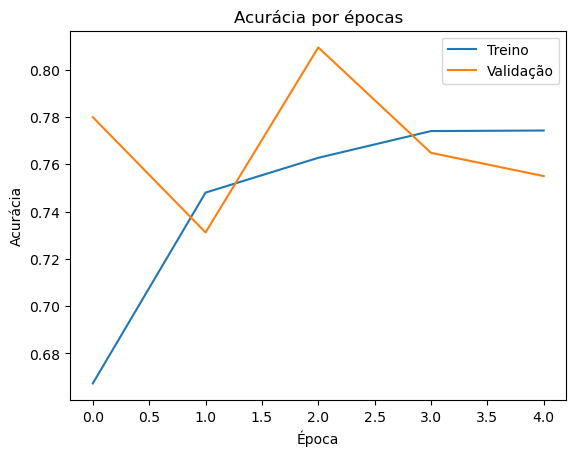

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino','Validação'])

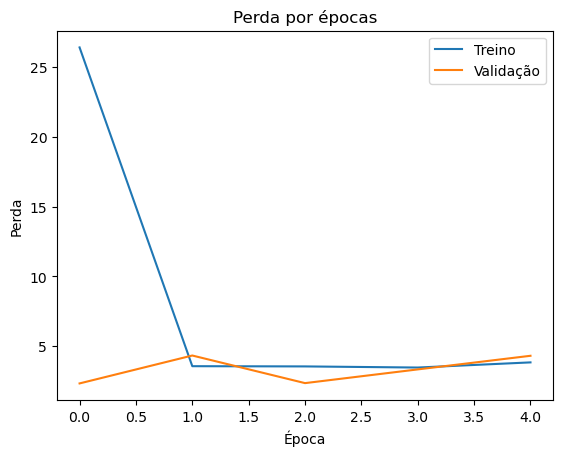

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treino','Validação'])

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 2.3275 - accuracy: 0.1001 - val_loss: 2.3041 - val_accuracy: 0.0995
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3031 - accuracy: 0.0974 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3029 - val_accuracy: 0.0957
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.0983


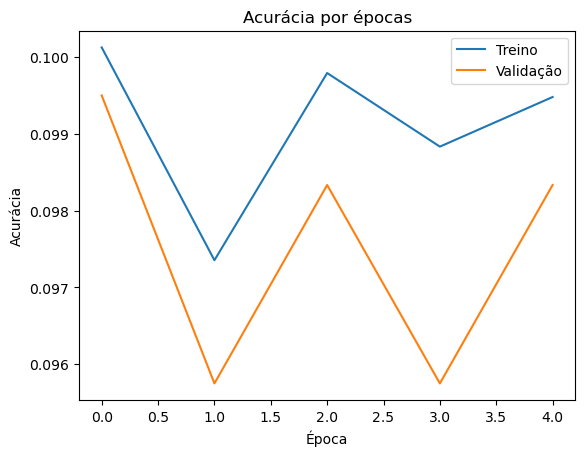

In [ ]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense_zerados])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics =['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split= 0.2)


plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino','Validação'])

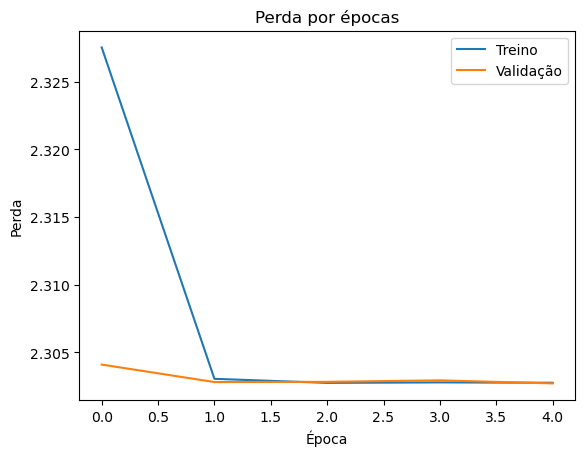

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treino','Validação'])

Epoch 1/5
100/100 [==============================] - 4s 16ms/step - loss: 0.6657 - accuracy: 0.7661 - val_loss: 0.4616 - val_accuracy: 0.8364
Epoch 2/5
100/100 [==============================] - 2s 20ms/step - loss: 0.4407 - accuracy: 0.8449 - val_loss: 0.3996 - val_accuracy: 0.8584
Epoch 3/5
100/100 [==============================] - 2s 22ms/step - loss: 0.3911 - accuracy: 0.8612 - val_loss: 0.3767 - val_accuracy: 0.8665
Epoch 4/5
100/100 [==============================] - 2s 20ms/step - loss: 0.3614 - accuracy: 0.8696 - val_loss: 0.3653 - val_accuracy: 0.8691
Epoch 5/5
100/100 [==============================] - 2s 21ms/step - loss: 0.3471 - accuracy: 0.8734 - val_loss: 0.3597 - val_accuracy: 0.8713


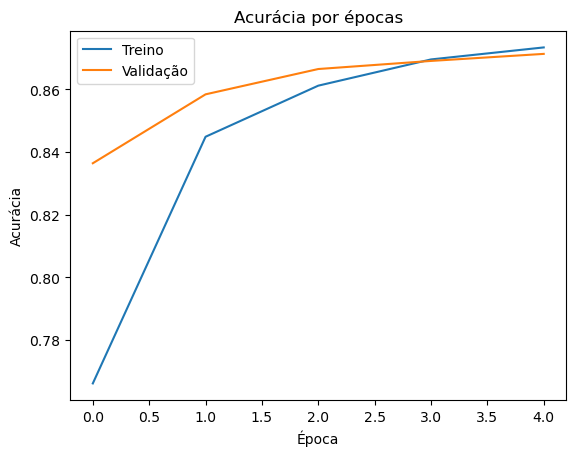

In [21]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation= tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation= tensorflow.nn.softmax)
])

adam =  keras.optimizers.Adam(lr=0.002) #lr => taxa de aprendizado

modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics =['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino,batch_size= 480 , epochs=5, validation_split= 0.2)


plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino','Validação'])

In [28]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation= tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation= tensorflow.nn.softmax)
])

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),keras.callbacks.ModelCheckpoint(filepath= 'melhor_modelo',monitor='val_loss', save_best_only=True)]
adam =  keras.optimizers.Adam(lr=0.002) #lr => taxa de aprendizado

modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics =['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino,batch_size= 480 , epochs=5, validation_split= 0.2, callbacks = callbacks)

c:\Users\bruno.silva\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/5
125/125 [==============================] - 2s 9ms/step - loss: 0.6162 - accuracy: 0.7844 - val_loss: 0.4533 - val_accuracy: 0.8250
INFO:tensorflow:Assets written to: melhor_modelo\assets
